In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/home/kortkamp/mambaforge/envs/lightning_bg/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
path1 = "../data/double-well/scale02.csv"
df1 = pd.read_csv(path1)
path2 = "../data/double-well/scale-2.csv"
df2 = pd.read_csv(path2)
path3 = "../data/double-well/scale-3.csv"
df3 = pd.read_csv(path3)

In [5]:
df1

,Unnamed: 0,training/loss,validation/loss
0,0,3.499837e+00,3.527077e+00
1,1,3.504787e+00,3.530060e+00
2,2,3.500612e+00,3.530959e+00
3,3,3.495543e+00,3.531867e+00
4,4,3.506294e+00,3.530103e+00
...,...,...,...
66,66,8.205759e+34,inf
67,67,1.816094e+26,1.795378e+26
68,68,2.559273e+26,2.521591e+26
69,69,2.909959e+28,2.779540e+28


Text(0.5, 1.0, 'Distribution of the loss')

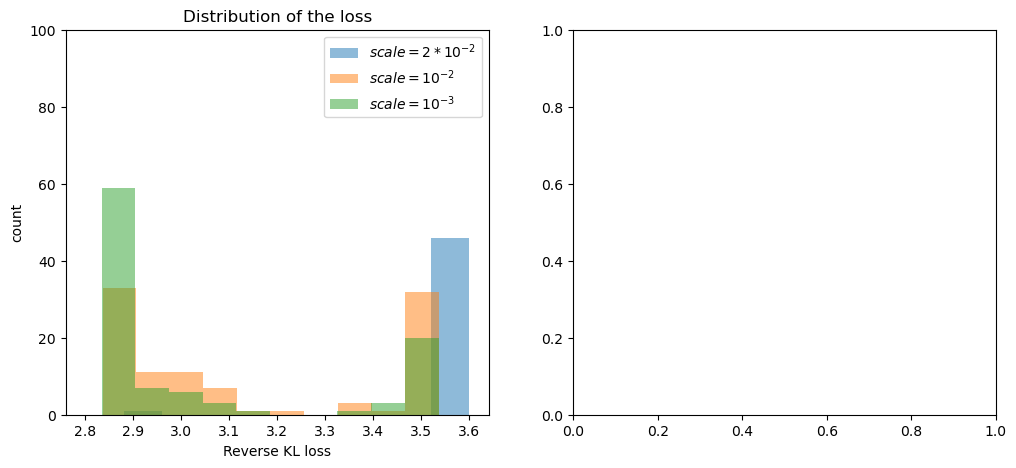

In [50]:
loss1 = df1["validation/loss"]
loss2 = df2["validation/loss"]
loss3 = df3["validation/loss"]
fig, [ax1, ax2] = plt.subplots(1, 2, sharey=False, figsize=(12, 5))
ax1.hist(loss1, bins=10, alpha=.5, label=r"$scale=2*10^{-2}$", range=(2.8, 3.6))
ax1.hist(loss2, bins=10, alpha=.5, label=r"$scale=10^{-2}$")
ax1.hist(loss3, bins=10, alpha=.5, label=r"$scale=10^{-3}$")
ax1.set_xlabel("Reverse KL loss")
ax1.set_ylabel("count")
ax1.legend()
ax1.set_ylim(0, 100)
ax1.set_title(r"Distribution of the loss")

In [15]:
((df1["validation/loss"] < 1000) * (df1["validation/loss"] > 3.2)).sum()

50

In [51]:
n_collapsed1 = ((df1["validation/loss"] < 1000) * (df1["validation/loss"] > 3.2)).sum()
n_diverged1 = (df1["validation/loss"] > 10).sum()

upper_mean2 = df2["validation/upper_mean"]
lower_mean2 = df2["validation/lower_mean"]
n_diverged2 = 0
n_collapsed2 = (100 - np.sum(upper_mean2 > -5)) + (100 - np.sum(lower_mean2 > -5))

upper_mean3 = df3["validation/upper_mean"]
lower_mean3 = df3["validation/lower_mean"]
n_diverged3 = 0
n_collapsed3 = (100 - np.sum(upper_mean3 > -5)) + (100 - np.sum(lower_mean3 > -5))

ax2.errorbar([.02, .01, .001], [n_collapsed1, n_collapsed2, n_collapsed3], np.sqrt([n_collapsed1, n_collapsed2, n_collapsed3]), fmt="o", label="collapsed")
ax2.errorbar([.02, .01, .001], [n_diverged1, n_diverged2, n_diverged3], np.sqrt([n_diverged1, n_diverged2, n_diverged3]), fmt="o", label="diverged")
ax2.set_xscale("log")
ax2.set_xlabel("scale of perturbation")
ax2.set_ylabel("count")
ax2.set_ylim(0, 100)
ax2.legend()
ax2.set_title("Number of runs that collapsed or diverged")

Text(0.5, 1.0, 'Number of runs that collapsed or diverged')

In [53]:
fig.savefig("double_well_perturbation.svg", bbox_inches="tight")

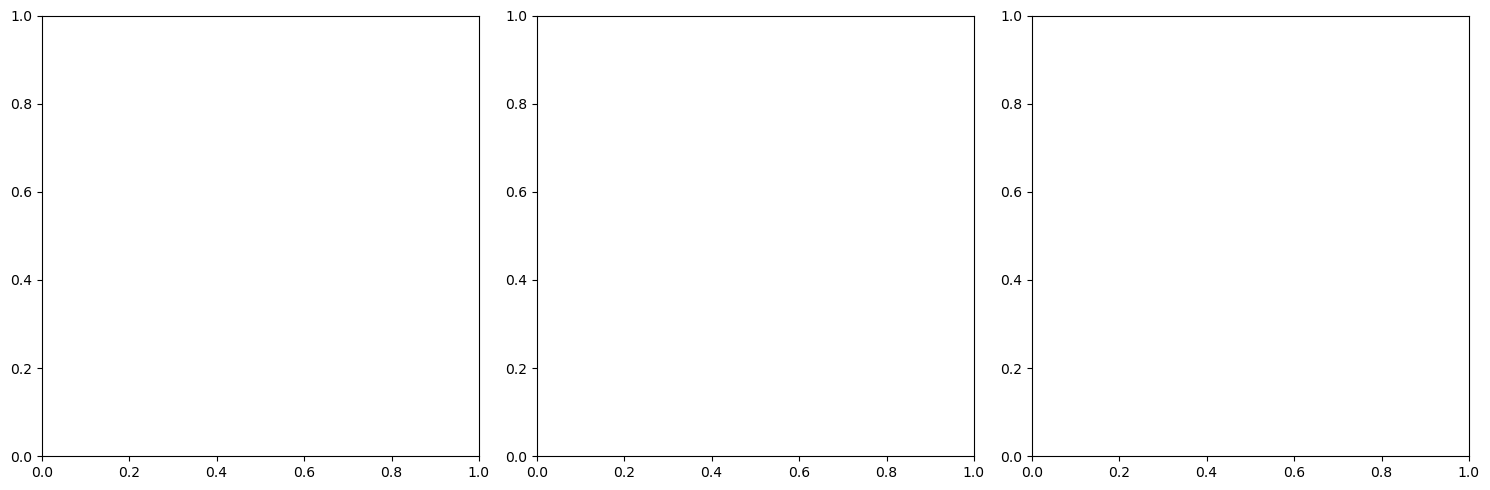

In [69]:
fig, axs = plt.subplot_mosaic("ABC", figsize=(15, 5))
fig.tight_layout()